# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [ ]:
import pandas as pd

## imports for Python, Pandas

In [ ]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [ ]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

/opt/conda/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [ ]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

/opt/conda/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [ ]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [ ]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [ ]:
bank_project_df = pd.read_json('data/world_bank_projects.json')
bank_project_df
bank_project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sector                    500 non-null    object
 1   supplementprojectflg      498 non-null    object
 2   projectfinancialtype      500 non-null    object
 3   prodline                  500 non-null    object
 4   mjtheme                   491 non-null    object
 5   idacommamt                500 non-null    int64 
 6   impagency                 472 non-null    object
 7   project_name              500 non-null    object
 8   mjthemecode               500 non-null    object
 9   closingdate               370 non-null    object
 10  totalcommamt              500 non-null    int64 
 11  id                        500 non-null    object
 12  mjsector_namecode         500 non-null    object
 13  docty                     446 non-null    object
 14  sector1                   

In [ ]:
# Q1. Find the 10 countries with most projects
# Do count by value based on country name
top_10_countries_most_projects = bank_project_df.countryname.value_counts()[:10]
top_10_countries_most_projects

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

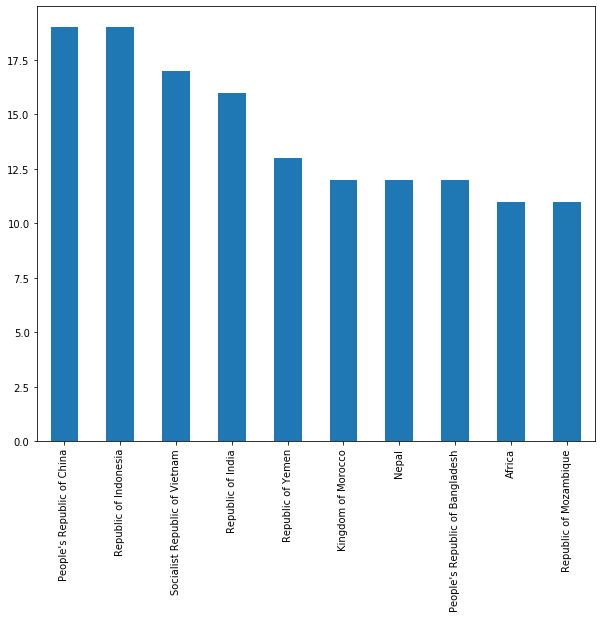

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=((10,8)))
top_10_countries_most_projects.plot(kind='bar')

In [ ]:
# Q2) Find the top 10 major project themes (using column 'mjtheme_namecode')
# select mjtheme_namecode from df
project_themes = bank_project_df.mjtheme_namecode
# the value is a list of dict, explode it to convert to multiple rows of dict
exploded_list = project_themes.explode()
# normalize dictionary
normalized_list_df = pd.json_normalize(exploded_list)
# value count on name column and select top 10
normalized_list_df.name.value_counts()[:10]


Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

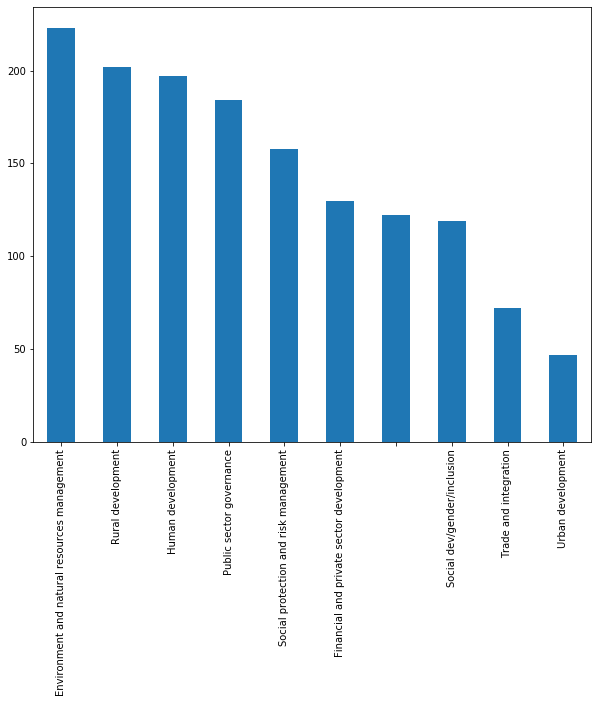

In [ ]:
plt.figure(figsize=((10,8)))
normalized_list_df.name.value_counts()[:10].plot(kind='bar')

In [ ]:
# Q3) In  above you will notice that some entries have only the code and the name is missing.
# Create a dataframe with the missing names filled in.
# In this first approach we will use a mapping table to find code to name mapping  
project_themes = bank_project_df.mjtheme_namecode
# the value is a list of dict, explode it to convert to multiple rows of dict
exploded_list = project_themes.explode()
# normalize dictionary
normalized_list_df = pd.json_normalize(exploded_list)
# create a mapping table to find code-to-name mapping 
code_name_mapping_df = normalized_list_df
code_name_mapping_df = code_name_mapping_df[code_name_mapping_df.name.str.strip() != ''].drop_duplicates()
code_name_mapping_df
# merge original df with code name mapping based on code column
joined_df = normalized_list_df.merge(code_name_mapping_df, how='inner', on ='code')
# the filled name columns appears now as a new column called name_y and original name column becomes name_x
# rename name_y to name 
joined_df.rename(columns = {'name_y':'name'}, inplace = True)
# drop name_x
final_df = joined_df.drop('name_x',1)
# sort the final dataframe to find top 10 project themes
final_df.name.value_counts()[:10]

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

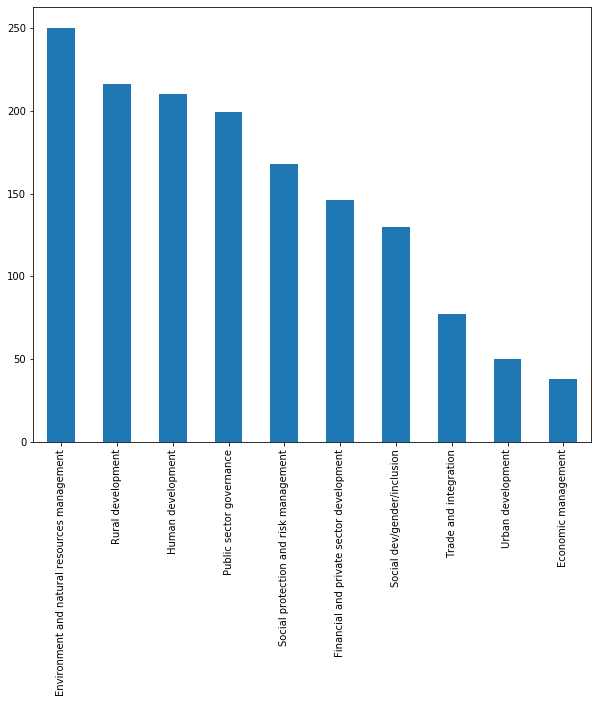

In [ ]:
plt.figure(figsize=((10,8)))
final_df.name.value_counts()[:10].plot(kind='bar')

In [ ]:
# Q3) Alternate way 
# sort the dataframe based on code
# use forward fill method to replace missing values
# but this might not be fully accurate as it does not consider the relation between code and name
# but since atleast one of the actual name values appears before a empty string
# this is almost accurate and result matches with above
import numpy as np
project_themes = bank_project_df.mjtheme_namecode
# the value is a list of dict, explode it to convert to multiple rows of dict
exploded_list = project_themes.explode()
# normalize dictionary
normalized_list_df = pd.json_normalize(exploded_list)
sorted_df = normalized_list_df.sort_values(by='code')
sorted_df[:60]

# replace empty string with nan
nan_replaced_df = sorted_df.replace(r'^$', np.nan, regex=True)

# fill nan values using forwardfill
normalized_list_df_filled = nan_replaced_df.fillna(method='ffill')
# now we can see that there is no missing values
normalized_list_df_filled.name.value_counts()[:10]


Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64